In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/kaggle/input/crime-boston/Bri Auspland - crime.csv"
crime = pd.read_csv(path, encoding="latin1")
crime.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


Write a program that calculates:
* the total number of crimes committed, for each month for a given year
* for each month of the year, the number of crimes committed on each day of the week

The program should display the results using plots. Can we find any patterns ?

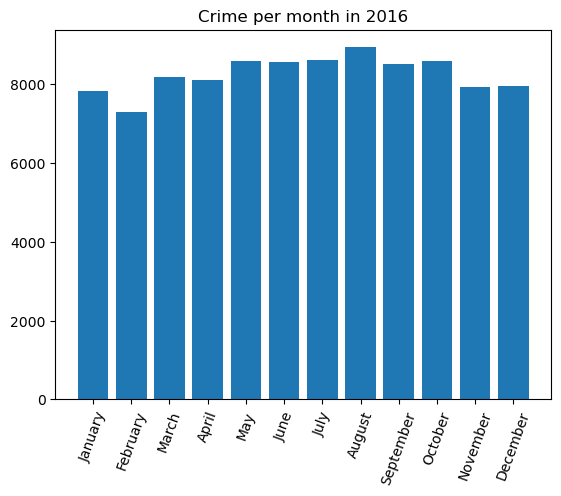

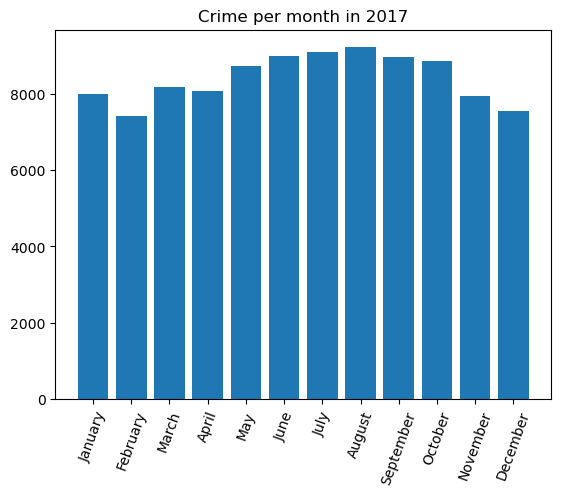

{2016: {1: [{'Monday': 938, 'Tuesday': 1027, 'Wednesday': 1002, 'Thursday': 1091, 'Friday': 1525, 'Saturday': 1244, 'Sunday': 1010}, 7837], 2: [{'Monday': 1281, 'Tuesday': 1052, 'Wednesday': 1000, 'Thursday': 1021, 'Friday': 1050, 'Saturday': 1035, 'Sunday': 871}, 7310], 3: [{'Monday': 1019, 'Tuesday': 1360, 'Wednesday': 1313, 'Thursday': 1338, 'Friday': 1064, 'Saturday': 1083, 'Sunday': 1022}, 8199], 4: [{'Monday': 1094, 'Tuesday': 1047, 'Wednesday': 1139, 'Thursday': 1056, 'Friday': 1463, 'Saturday': 1320, 'Sunday': 982}, 8101], 5: [{'Monday': 1390, 'Tuesday': 1425, 'Wednesday': 1107, 'Thursday': 1178, 'Friday': 1118, 'Saturday': 1077, 'Sunday': 1287}, 8582], 6: [{'Monday': 1154, 'Tuesday': 1165, 'Wednesday': 1513, 'Thursday': 1477, 'Friday': 1236, 'Saturday': 1046, 'Sunday': 967}, 8558], 7: [{'Monday': 1142, 'Tuesday': 1156, 'Wednesday': 1152, 'Thursday': 1126, 'Friday': 1395, 'Saturday': 1385, 'Sunday': 1264}, 8620], 8: [{'Monday': 1558, 'Tuesday': 1496, 'Wednesday': 1507, 'Thursda

In [3]:
def crime_cataloge(data, years):
    """year must be a list even if it's only one"""
    months = [num for num in range(1,13)]
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    crime_dict = {}
    
    for year in years:
        crime_dict[year] = {}
        y = []
        
        for month in months:
            crime_dict[year][month] = [{}, 0]
            
            for day in days:
                d = data[(data['MONTH'] == month) & (data["YEAR"] == year)]
                crime_dict[year][month][0][day] = d.DAY_OF_WEEK.value_counts()[day]
                crime_dict[year][month][1] = sum(crime_dict[year][month][0].values())
                
            y.append(crime_dict[year][month][1])
        
        plt.bar(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], y)
        plt.title(f"Crime per month in {year}")
        plt.xticks(rotation=70)
        plt.show()
            
    return crime_dict
    
crime_d = crime_cataloge(crime, [2016, 2017])
print(crime_d)

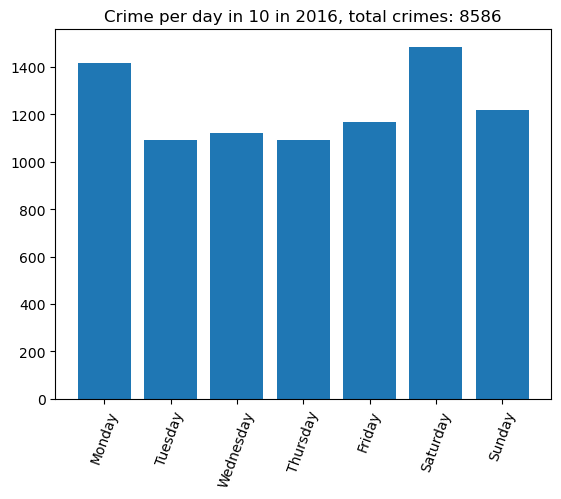

In [4]:
ye = 2016
mo = 10
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], crime_d[ye][mo][0].values())
plt.title(f"Crime per day in {mo} in {ye}, total crimes: {crime_d[ye][mo][1]}")
plt.xticks(rotation=70)
plt.show()